# Serious data prep

### 1. Changing file names
renaming raw photos according to the following formula: photo i (where i is the photo number from 01)

In [ ]:
import os

folder_path = "C:\\Users\\Kasia\\OV_notebooks\\openvino_env\\Scripts\\openvino_notebooks\\notebooks\\000-erytrocyty\\data\\rav"

# Sprawdź czy ścieżka istnieje
if os.path.exists(folder_path):
    # Zmienne do numerowania zdjęć
    counter = 1

    # Przejdź przez pliki w folderze
    for filename in os.listdir(folder_path):
        # Pełna ścieżka pliku
        old_path = os.path.join(folder_path, filename)

        # Rozszerzenie pliku
        extension = os.path.splitext(filename)[1]

        # Nowa nazwa pliku
        new_filename = f"photo_{counter:02d}{extension}"

        # Pełna ścieżka nowego pliku
        new_path = os.path.join(folder_path, new_filename)

        # Zmiana nazwy pliku
        os.rename(old_path, new_path)

        # Zwiększ licznik
        counter += 1

    print("Zmieniono nazwy plików.")
else:
    print("Podana ścieżka nie istnieje.")

### 2. Selecting the binarization threshold

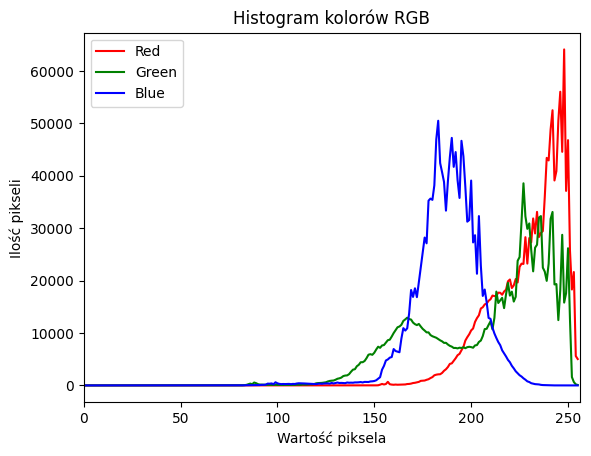

In [33]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

folder_path = r"C:\\Users\\Kasia\\OV_notebooks\\openvino_env\\Scripts\\openvino_notebooks\\notebooks\\000-erytrocyty\\data\\rav"
source_file = "photo_06.png"
img_path = os.path.join(folder_path, source_file)

def draw_histogram(image, title):
    # Oblicz histogramy dla kanałów RGB
    hist_red = cv.calcHist([image], [0], None, [256], [0, 256])
    hist_green = cv.calcHist([image], [1], None, [256], [0, 256])
    hist_blue = cv.calcHist([image], [2], None, [256], [0, 256])

    # Rysuj histogramy na jednym wykresie
    plt.plot(hist_red, color='red', label='Red')
    plt.plot(hist_green, color='green', label='Green')
    plt.plot(hist_blue, color='blue', label='Blue')

    plt.title(title)
    plt.xlabel('Wartość piksela')
    plt.ylabel('Ilość pikseli')
    plt.xlim([0, 256])
    plt.legend()
    plt.show()
    
# Sprawdź, czy plik istnieje
assert os.path.exists(img_path), "File could not be read, check with os.path.exists()"

# Wczytaj obraz
img = cv.imread(img_path, cv.IMREAD_COLOR)

# Sprawdź, czy obraz został poprawnie wczytany
assert img is not None, "File could not be read, check with os.path.exists()"

# Podziel obraz na kanały kolorów
b, g, r = cv.split(img)

# Ustaw początkowe zakresy wartości dla progów binaryzacji dla kanałów czerwonego, zielonego i niebieskiego
# 195, 146, 208, 196, 170, 217 -> samples of color of an erythrocyte
range_red = [150, 255] 
range_green = [200, 255]
range_blue = [130, 230]
# Binaryzacja kanałów czerwonego, zielonego i niebieskiego na podstawie zakresów wartości
_, thresh_r = cv.threshold(r, *range_red, cv.THRESH_BINARY)
_, thresh_g = cv.threshold(g, *range_green, cv.THRESH_BINARY)
_, thresh_b = cv.threshold(b, *range_blue, cv.THRESH_BINARY)

# Połączenie binaryzowanych kanałów
binary_image = cv.bitwise_and(thresh_r, cv.bitwise_and(thresh_g, thresh_b))

# Konwersja na obraz czarno-biały
binary_image[binary_image > 0] = 255  # Wszystkie wartości różne od zera ustawiane są na 255

# Konwersja na obraz w odcieniach szarości
binary_image = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)

def invert_colors(image):
    return cv.bitwise_not(image)

# Funkcja do aktualizacji obrazu po zmianie wartości slidera
def update(val):
    
    _, thresh_r = cv.threshold(r, *range_red, cv.THRESH_BINARY)
    _, thresh_g = cv.threshold(g, *range_green, cv.THRESH_BINARY)
    _, thresh_b = cv.threshold(b, *range_blue, cv.THRESH_BINARY)
    
    # Połączenie binaryzowanych kanałów
    binary_image = cv.bitwise_and(thresh_r, cv.bitwise_and(thresh_g, thresh_b))
    
    # Konwersja na obraz czarno-biały
    binary_image[binary_image > 0] = 255
    
    # Inwersja kolorów
    # binary_image = invert_colors(binary_image)
    
    # Konwersja na obraz w odcieniach szarości
    binary_image_gray = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)

update(None)
color_img = cv.imread(img_path, cv.IMREAD_COLOR)

# Rysuj histogramy dla kanałów RGB
draw_histogram(color_img, 'Histogram kolorów RGB')

### 3. Printing exemple of makin bin pic (checking if treshold was set correctly)

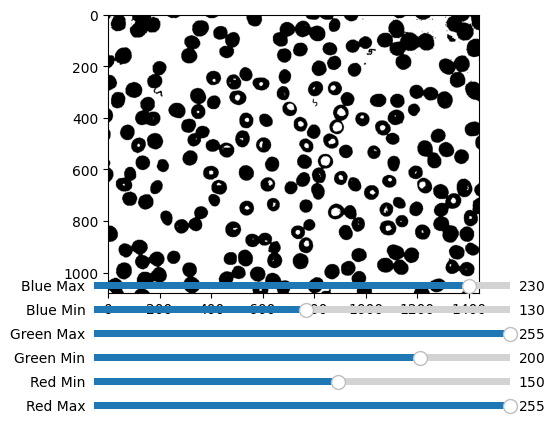

In [15]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

folder_path = r"C:\\Users\\Kasia\\OV_notebooks\\openvino_env\\Scripts\\openvino_notebooks\\notebooks\\000-erytrocyty\\data\\rav"
source_file = "photo_01.png"
img_path = os.path.join(folder_path, source_file)

# Sprawdź, czy plik istnieje
assert os.path.exists(img_path), "File could not be read, check with os.path.exists()"

# Wczytaj obraz
img = cv.imread(img_path, cv.IMREAD_COLOR)

# Sprawdź, czy obraz został poprawnie wczytany
assert img is not None, "File could not be read, check with os.path.exists()"

# Podziel obraz na kanały kolorów
b, g, r = cv.split(img)

# Ustaw początkowe zakresy wartości dla progów binaryzacji dla kanałów czerwonego, zielonego i niebieskiego
# 195, 146, 208, 196, 170, 217 -> samples of color of an erythrocyte
range_red = [150, 255] 
range_green = [200, 255]
range_blue = [130, 230]
# Binaryzacja kanałów czerwonego, zielonego i niebieskiego na podstawie zakresów wartości
_, thresh_r = cv.threshold(r, *range_red, cv.THRESH_BINARY)
_, thresh_g = cv.threshold(g, *range_green, cv.THRESH_BINARY)
_, thresh_b = cv.threshold(b, *range_blue, cv.THRESH_BINARY)

# Połączenie binaryzowanych kanałów
binary_image = cv.bitwise_and(thresh_r, cv.bitwise_and(thresh_g, thresh_b))

# Konwersja na obraz czarno-biały
binary_image[binary_image > 0] = 255  # Wszystkie wartości różne od zera ustawiane są na 255

# Konwersja na obraz w odcieniach szarości
binary_image = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)

def invert_colors(image):
    return cv.bitwise_not(image)

# Funkcja do aktualizacji obrazu po zmianie wartości slidera
def update(val):
    range_red[0] = red_slider_min.val
    range_red[1] = red_slider_max.val
    range_green[0] = green_slider_min.val
    range_green[1] = green_slider_max.val
    range_blue[0] = blue_slider_min.val
    range_blue[1] = blue_slider_max.val
    
    _, thresh_r = cv.threshold(r, *range_red, cv.THRESH_BINARY)
    _, thresh_g = cv.threshold(g, *range_green, cv.THRESH_BINARY)
    _, thresh_b = cv.threshold(b, *range_blue, cv.THRESH_BINARY)
    
    # Połączenie binaryzowanych kanałów
    binary_image = cv.bitwise_and(thresh_r, cv.bitwise_and(thresh_g, thresh_b))
    
    # Konwersja na obraz czarno-biały
    binary_image[binary_image > 0] = 255
    
    # Inwersja kolorów
    # binary_image = invert_colors(binary_image)
    
    # Konwersja na obraz w odcieniach szarości
    binary_image_gray = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)
    
    ax.imshow(cv.cvtColor(binary_image_gray, cv.COLOR_BGR2RGB))
    fig.canvas.draw_idle()

# Tworzenie interaktywnego wykresu z suwakami
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)

# Ustawienia dla suwaka czerwonego (minimalna wartość)
red_slider_min_ax = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
red_slider_min = Slider(red_slider_min_ax, 'Red Min', 0, 255, valinit=range_red[0], valstep=1)

# Ustawienia dla suwaka czerwonego (maksymalna wartość)
red_slider_max_ax = plt.axes([0.2, 0.05, 0.65, 0.03], facecolor='lightgoldenrodyellow')
red_slider_max = Slider(red_slider_max_ax, 'Red Max', 0, 255, valinit=range_red[1], valstep=1)

# Ustawienia dla suwaka zielonego (minimalna wartość)
green_slider_min_ax = plt.axes([0.2, 0.15, 0.65, 0.03], facecolor='lightgoldenrodyellow')
green_slider_min = Slider(green_slider_min_ax, 'Green Min', 0, 255, valinit=range_green[0], valstep=1)

# Ustawienia dla suwaka zielonego (maksymalna wartość)
green_slider_max_ax = plt.axes([0.2, 0.2, 0.65, 0.03], facecolor='lightgoldenrodyellow')
green_slider_max = Slider(green_slider_max_ax, 'Green Max', 0, 255, valinit=range_green[1], valstep=1)

# Ustawienia dla suwaka niebieskiego (minimalna wartość)
blue_slider_min_ax = plt.axes([0.2, 0.25, 0.65, 0.03], facecolor='lightgoldenrodyellow')
blue_slider_min = Slider(blue_slider_min_ax, 'Blue Min', 0, 255, valinit=range_blue[0], valstep=1)

# Ustawienia dla suwaka niebieskiego (maksymalna wartość)
blue_slider_max_ax = plt.axes([0.2, 0.3, 0.65, 0.03], facecolor='lightgoldenrodyellow')
blue_slider_max = Slider(blue_slider_max_ax, 'Blue Max', 0, 255, valinit=range_blue[1], valstep=1)

update(None)
# Połączenie suwaków z funkcją aktualizacji
red_slider_min.on_changed(update)
red_slider_max.on_changed(update)
green_slider_min.on_changed(update)
green_slider_max.on_changed(update)
blue_slider_min.on_changed(update)
blue_slider_max.on_changed(update)

plt.show()

## Making bin pic from rav photos

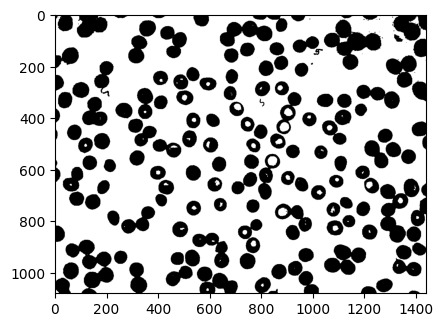

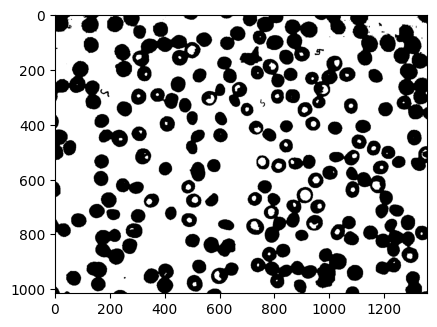

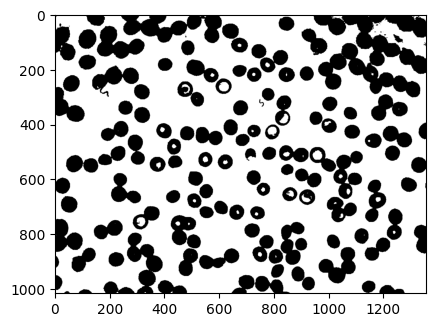

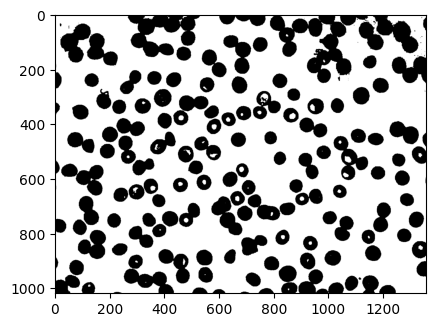

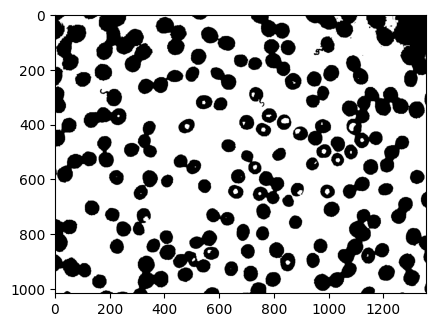

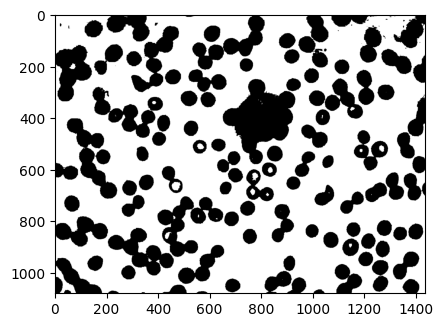

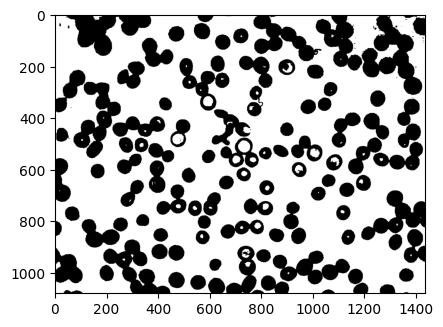

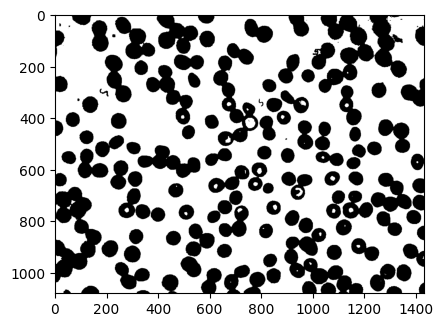

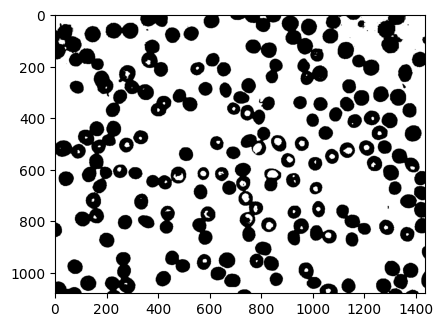

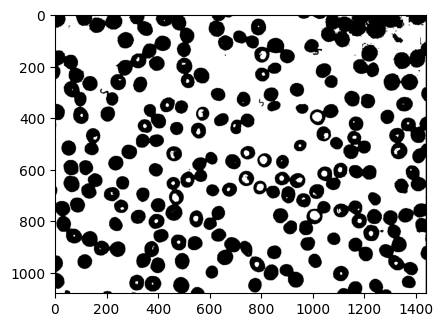

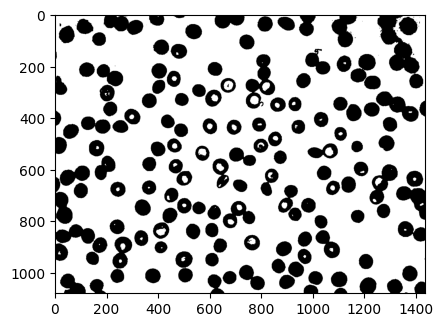

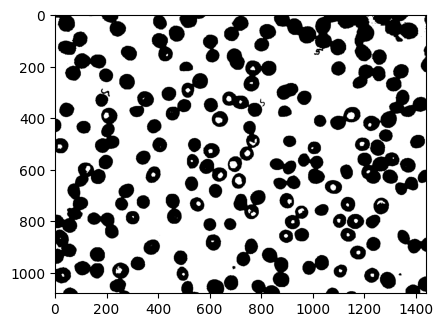

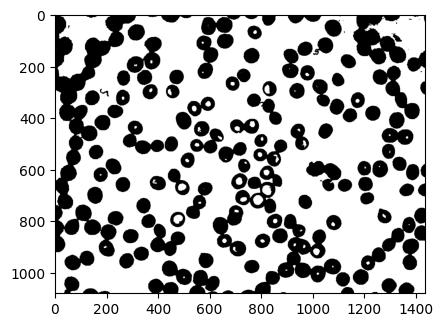

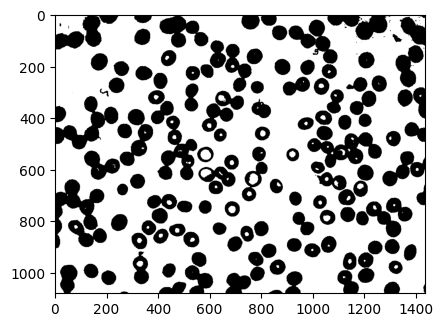

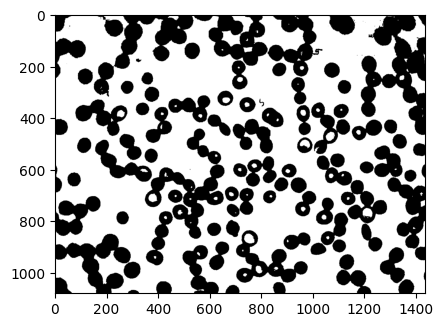

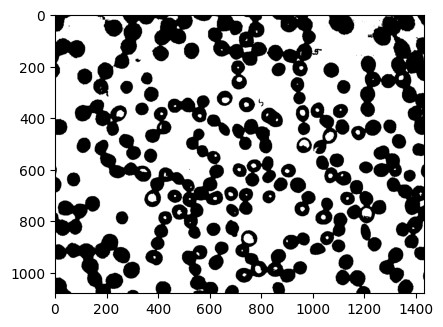

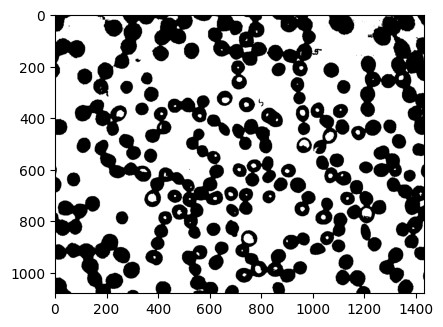

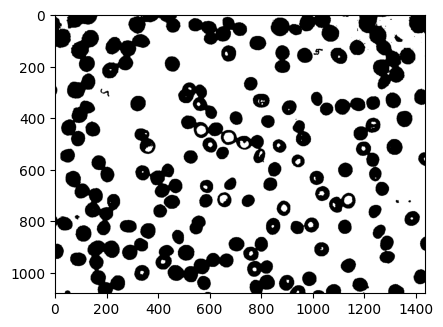

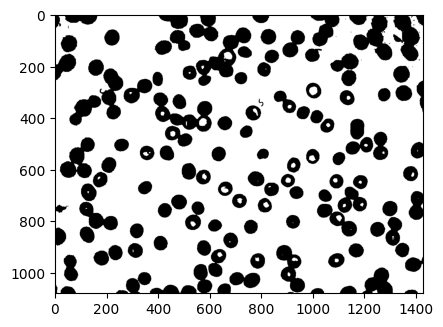

In [32]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

folder_path = r"C:\\Users\\Kasia\\OV_notebooks\\openvino_env\\Scripts\\openvino_notebooks\\notebooks\\000-erytrocyty\\data\\rav"

def invert_colors(image):
    return cv.bitwise_not(image)

# Funkcja do aktualizacji obrazu po zmianie wartości slidera
def update(val): 
    _, thresh_r = cv.threshold(r, *range_red, cv.THRESH_BINARY)
    _, thresh_g = cv.threshold(g, *range_green, cv.THRESH_BINARY)
    _, thresh_b = cv.threshold(b, *range_blue, cv.THRESH_BINARY)
    
    # Połączenie binaryzowanych kanałów
    binary_image = cv.bitwise_and(thresh_r, cv.bitwise_and(thresh_g, thresh_b))
    
    # Konwersja na obraz czarno-biały
    binary_image[binary_image > 0] = 255
    
    # Inwersja kolorów
    # binary_image = invert_colors(binary_image)
    
    # Konwersja na obraz w odcieniach szarości
    binary_image_gray = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)
    
    ax.imshow(cv.cvtColor(binary_image_gray, cv.COLOR_BGR2RGB))
    fig.canvas.draw_idle()

# define which number of rav photos would be used to create bin
file_min = 1
file_max = 19
file_names = ["photo_{:02d}.png".format(name) for name in range(file_min, file_max + 1)]
# source_file = "photo_01.png"

for file_name in file_names:

    img_path = os.path.join(folder_path, file_name)

    # Sprawdź, czy plik istnieje
    assert os.path.exists(img_path), "File could not be read, check with os.path.exists()"

    # Wczytaj obraz
    img = cv.imread(img_path, cv.IMREAD_COLOR)

    # Sprawdź, czy obraz został poprawnie wczytany
    assert img is not None, "File could not be read, check with os.path.exists()"

    # Podziel obraz na kanały kolorów
    b, g, r = cv.split(img)

    # Ustaw początkowe zakresy wartości dla progów binaryzacji dla kanałów czerwonego, zielonego i niebieskiego
    # 195, 146, 208, 196, 170, 217 -> samples of color of an erythrocyte
    range_red = [150, 255] 
    range_green = [200, 255]
    range_blue = [130, 230]
    # Binaryzacja kanałów czerwonego, zielonego i niebieskiego na podstawie zakresów wartości
    _, thresh_r = cv.threshold(r, *range_red, cv.THRESH_BINARY)
    _, thresh_g = cv.threshold(g, *range_green, cv.THRESH_BINARY)
    _, thresh_b = cv.threshold(b, *range_blue, cv.THRESH_BINARY)

    # Połączenie binaryzowanych kanałów
    binary_image = cv.bitwise_and(thresh_r, cv.bitwise_and(thresh_g, thresh_b))

    # Konwersja na obraz czarno-biały
    binary_image[binary_image > 0] = 255  # Wszystkie wartości różne od zera ustawiane są na 255

    # Konwersja na obraz w odcieniach szarości
    binary_image = cv.cvtColor(binary_image, cv.COLOR_GRAY2BGR)

    # Tworzenie interaktywnego wykresu z suwakami
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.3)

    update(None)
    output_bin_dir = r"C:\\Users\\Kasia\\OV_notebooks\\openvino_env\\Scripts\\openvino_notebooks\\notebooks\\000-erytrocyty\\data\\bin"
    output_path = os.path.join(output_bin_dir, file_name)
    cv.imwrite(output_path, binary_image)
    plt.show()